## Malaria Cell Images

### Detecting Malaria by Using Cell image Classification

#### Dataset is from Kaggle originated from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

#### Dataset contains 2 folders
    - Infected
    - Uninfected
    - Total of 27,558 images

### Image Classification Using Transfer Learning-Keras MobileNet

In [1]:
# Importing libraries
import os 
import glob
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.metrics import CategoricalCrossentropy
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Activation,BatchNormalization,Conv2D,MaxPool2D

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/home/niraj/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Dataset Path
train_path = 'cell_images/train'

test_path = 'cell_images/test/'

In [3]:
# Creating Train and Test Batches
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Parasitized', 'Uninfected'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Parasitized', 'Uninfected'], batch_size=10)

Found 4048 images belonging to 2 classes.
Found 2445 images belonging to 2 classes.


In [4]:
# Images labels
imgs, labels = next(train_batches)

In [5]:
# Function for  plotting Images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

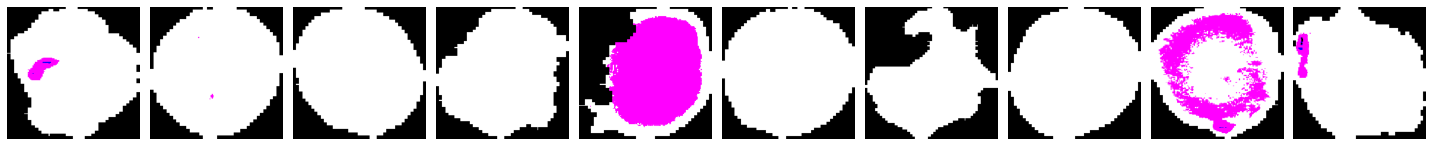

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [6]:
# Plbotting Images
plotImages(imgs)
print(labels)

In [7]:
# Importing MobileNet
mobile = tf.keras.applications.mobilenet.MobileNet()

In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [9]:
type(mobile)

tensorflow.python.keras.engine.functional.Functional

In [10]:
x = mobile.layers[-6].output

In [11]:
# Creating output layer
output = Dense(units=2, activation='softmax')(x)

In [12]:
model = Model(inputs=mobile.input, outputs=output)

In [13]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=test_batches,
            validation_steps=len(test_batches),
            epochs=10,
            verbose=1)

Epoch 1/10
405/405 [==============================] - 289s 702ms/step - loss: 0.3771 - accuracy: 0.8320 - val_loss: 0.1319 - val_accuracy: 0.9456
Epoch 2/10
405/405 [==============================] - 281s 695ms/step - loss: 0.1440 - accuracy: 0.9427 - val_loss: 0.2385 - val_accuracy: 0.8998
Epoch 3/10
405/405 [==============================] - 282s 698ms/step - loss: 0.1054 - accuracy: 0.9625 - val_loss: 0.0646 - val_accuracy: 0.9767
Epoch 4/10
405/405 [==============================] - 283s 700ms/step - loss: 0.0690 - accuracy: 0.9807 - val_loss: 0.1570 - val_accuracy: 0.9337
Epoch 5/10
405/405 [==============================] - 277s 684ms/step - loss: 0.0520 - accuracy: 0.9881 - val_loss: 0.0200 - val_accuracy: 0.9967
Epoch 6/10
405/405 [==============================] - 277s 685ms/step - loss: 0.0323 - accuracy: 0.9942 - val_loss: 0.0125 - val_accuracy: 0.9992
Epoch 7/10
405/405 [==============================] - 279s 689ms/step - loss: 0.0204 - accuracy: 0.9975 - val_loss: 0.0897 -

In [18]:
test_labels = test_batches.classes

In [19]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [21]:
# Function from sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'Parasitized': 0, 'Uninfected': 1}

Confusion matrix, without normalization
[[624 600]
 [605 616]]


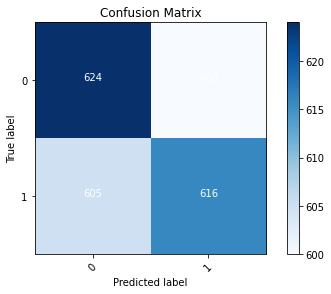

In [23]:
import itertools
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Test model on Image

In [26]:
img = image.load_img('cell_images/train/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_8.png',target_size=(224,224))

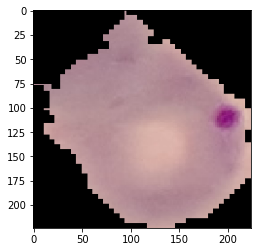

In [27]:
plt.imshow(img)
plt.show()

In [28]:
X = image.img_to_array(img)

In [29]:
X.shape

(224, 224, 3)

In [30]:
from tensorflow.keras.applications.resnet50 import preprocess_input

X=np.expand_dims(X,axis=0)
img_data=preprocess_input(X)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[9.9999952e-01, 4.7097046e-07]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
if(a==1):
    print("Uninfected")
else:
    print("Infected") 

Infected
